#   Assignment 1

#### The code in my assignement 1 has reference from the following meterials:
http://bluewhale.cc/2016-08-21/python-data-cleaning.html
https://www.jianshu.com/p/d9cbc9a6dc3b
https://www.cnblogs.com/beginner-boy/p/7239696.html

#### And I really appreciate TA Eugene's help.

## Part A - Cleaning and EDA

## 1. Cleaning

In [56]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import csv
import datetime as dt

First, load the data in csv file and take a preview.
There was an error at first. Then I found that it was because ome data is incompleted and needs to be cleaned up. So I added the attribute error_bad_lines=False and the error is gone. But there are still many exceptions because the data is dirty.

In [57]:
ufo = pd.read_csv("complete.csv", quoting=3, error_bad_lines=False)
ufo.head()

b'Skipping line 878: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1815: expected 11 fields, saw 12\nSkipping line 2858: expected 11 fields, saw 12\nSkipping line 3734: expected 11 fields, saw 12\nSkipping line 4756: expected 11 fields, saw 12\nSkipping line 5389: expected 11 fields, saw 12\nSkipping line 5423: expected 11 fields, saw 12\nSkipping line 5614: expected 11 fields, saw 12\nSkipping line 5849: expected 11 fields, saw 12\nSkipping line 6093: expected 11 fields, saw 12\nSkipping line 7516: expected 11 fields, saw 12\nSkipping line 7626: expected 11 fields, saw 12\nSkipping line 8893: expected 11 fields, saw 12\nSkipping line 9015: expected 11 fields, saw 12\nSkipping line 9571: expected 11 fields, saw 12\nSkipping line 9620: expected 11 fields, saw 12\nSkipping line 9751: expected 11 fields, saw 12\nSkipping line 10157: expected 11 fields, saw 12\nSkipping line 10427: expected 11 fields, saw 12\nSkipping line 12035: expected 11 fiel

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,"""This event took place in early fall around 19...",4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,"""1949 Lackland AFB&#44 TX. Lights racing acro...",12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,"""Green/Orange circular disc over Chester&#44 E...",1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,"""My older brother and twin sister were leaving...",1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,"""AS a Marine 1st Lt. flying an FJ4B fighter/at...",1/22/2004,21.4180556,-157.803611


#### Obviously, there are many warnings, and we need to do some clean ups to the data.

In [58]:
ufo.describe()

,longitude
count,88679.000000
mean,-85.021836
std,41.421744
min,-176.658056
25%,-112.073333
50%,-87.650000
75%,-77.769738
max,178.441900


Now let's do the clean up.
#### First, check if there are any duplicated rows.
I found there is no duplicated data.

### 1) Duplicated Rows

In [59]:
ufoFrame=pd.DataFrame(ufo)
ufoFrame.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
88649    False
88650    False
88651    False
88652    False
88653    False
88654    False
88655    False
88656    False
88657    False
88658    False
88659    False
88660    False
88661    False
88662    False
88663    False
88664    False
88665    False
88666    False
88667    False
88668    False
88669    False
88670    False
88671    False
88672    False
88673    False
88674    False
88675    False
88676    False
88677    False
88678    False
Length: 88679, dtype: bool

### 2) Null Value

Then, check if there are null values.
In datetime colomn, there is no missing value.

In [60]:
ufoFrame['datetime'].isnull().value_counts()

False    88679
Name: datetime, dtype: int64

In city column, there is no missing value either.

In [61]:
ufoFrame['city'].isnull().value_counts()

False    88679
Name: city, dtype: int64

In state column, there are 7409 missing values. But since we also have latitude and longitude columns to tell the position, this column is less important if our analysis is not relevant to city.

In [62]:
ufoFrame['state'].isnull().value_counts()

False    81270
True      7409
Name: state, dtype: int64

In country column, there are 12365 missing values. But since we also have latitude and longitude columns to tell the position, this column is less important if our analysis is not relevant to country.

In [63]:
ufoFrame['country'].isnull().value_counts()

False    76314
True     12365
Name: country, dtype: int64

In shape column, there are 2922 missing values. 

In [64]:
ufoFrame['shape'].isnull().value_counts()

False    85757
True      2922
Name: shape, dtype: int64

In duration (seconds) column, there are 2 missing values.

In [65]:
ufoFrame['duration (seconds)'].isnull().value_counts()

False    88677
True         2
Name: duration (seconds), dtype: int64

In duration (hours/min) column, there are 3017 missing values. But since this column can be converted from duration(seconds) column, we are not going to use the data in this column. We can either filling the null values to 0, or calculate them according to duration (seconds) column.

In [66]:
ufoFrame['duration (hours/min)'].isnull().value_counts()

False    85662
True      3017
Name: duration (hours/min), dtype: int64

In comments column, there is no missing value.

In [67]:
ufoFrame['comments'].isnull().value_counts()

False    88679
Name: comments, dtype: int64

In date posted column, there is no missing value.

In [68]:
ufoFrame['date posted'].isnull().value_counts()

False    88679
Name: date posted, dtype: int64

In latitude column, there is no missing value.

In [69]:
ufoFrame['latitude'].isnull().value_counts()

False    88679
Name: latitude, dtype: int64

In longitude column, there is no missing value.

In [70]:
ufoFrame['longitude'].isnull().value_counts()

False    88679
Name: longitude, dtype: int64

### 3) Invalid Value

We are done with checking missing values. Now lets cleanup the data.

First, fill the null fields in state column as 'N/A'. Then check if all fields in the column are filled.

In [71]:
ufoFrame['state']=ufoFrame['state'].fillna('N/A')

In [72]:
ufoFrame['state'].isnull().value_counts()

False    88679
Name: state, dtype: int64

Then, fill all the null country with N/A, and check.

In [73]:
ufoFrame['country']=ufoFrame['country'].fillna('N/A')
ufoFrame['country'].isnull().value_counts()

False    88679
Name: country, dtype: int64


Then, fill all the null shape with N/A, and check.

In [74]:
ufoFrame['shape']=ufoFrame['shape'].fillna('N/A')
ufoFrame['shape'].isnull().value_counts()

False    88679
Name: shape, dtype: int64

Then, because we are not using the duration (hours/min) column, we can directly drop it from the data frame.

In [75]:
ufoFrame= ufoFrame.drop('duration (hours/min)', 1)

Finally, drop two rows with null duration (seconds) value.

In [76]:
ufoFrame=ufoFrame.dropna(axis=0, how='any', thresh=None)
ufoFrame['duration (seconds)'].isnull().value_counts()

False    88677
Name: duration (seconds), dtype: int64

#### Third, let's check if there are invalid values. If so, parse them into the right data type.

In [77]:
ufoFrame.dtypes

datetime               object
city                   object
state                  object
country                object
shape                  object
duration (seconds)     object
comments               object
date posted            object
latitude               object
longitude             float64
dtype: object

In [78]:
ufoFrame['datetime']=pd.to_datetime(ufoFrame['datetime'],format="%m/%d/%Y %H:%M",errors='coerce')

In [79]:
ufoFrame['datetime']

0       1949-10-10 20:30:00
1       1949-10-10 21:00:00
2       1955-10-10 17:00:00
3       1956-10-10 21:00:00
4       1960-10-10 20:00:00
5       1961-10-10 19:00:00
6       1965-10-10 21:00:00
7       1965-10-10 23:45:00
8       1966-10-10 20:00:00
9       1966-10-10 21:00:00
10      1968-10-10 13:00:00
11      1968-10-10 19:00:00
12      1970-10-10 16:00:00
13      1970-10-10 19:00:00
14      1971-10-10 21:00:00
15      1972-10-10 19:00:00
16      1972-10-10 22:30:00
17      1973-10-10 19:00:00
18      1973-10-10 23:00:00
19      1974-10-10 17:00:00
20      1974-10-10 19:30:00
21      1974-10-10 21:30:00
22      1974-10-10 23:00:00
23      1975-10-10 17:00:00
24      1976-10-10 20:30:00
25      1976-10-10 22:00:00
26      1977-10-10 12:00:00
27      1977-10-10 22:00:00
28      1978-10-10 02:00:00
29      1979-10-10 00:00:00
                ...        
88649   2012-09-09 21:00:00
88650   2012-09-09 21:00:00
88651   2012-09-09 21:00:00
88652   2012-09-09 21:55:00
88653   2012-09-09 2

#### Only longitude is in data type float64. But duration(seconds) and longitude should be float as well.

In [80]:
pd.to_numeric(ufoFrame['duration (seconds)'])

ValueError: Unable to parse string "2`" at position 30821

unable to parse string "2`", so I want to keep this error for reference

In [81]:
ufoFrame.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,"""This event took place in early fall around 19...",4/27/2004,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,N/A,light,7200,"""1949 Lackland AFB&#44 TX. Lights racing acro...",12/16/2005,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),N/A,gb,circle,20,"""Green/Orange circular disc over Chester&#44 E...",1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,"""My older brother and twin sister were leaving...",1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,"""AS a Marine 1st Lt. flying an FJ4B fighter/at...",1/22/2004,21.4180556,-157.803611


In [82]:
ufoFrame.at[30821, 'duration (seconds)']

'2`'

In [83]:
ufoFrame.at[30821, 'duration (seconds)'] = 2
ufoFrame.at[30821, 'duration (seconds)']

2

In [84]:
pd.to_numeric(ufoFrame['duration (seconds)'])

ValueError: Unable to parse string "8`" at position 39519

Since we can see that the recurring theme on the strings is the addition of character '`', we can use a lambda function to more
effectively remove it

In [85]:
ufoFrame.at[39519, 'duration (seconds)']

'8`'

In [86]:
ufoFrame.at[39519, 'duration (seconds)'] = 8
ufoFrame.at[39519, 'duration (seconds)']

8

In [87]:
# rstrip only works on strings, so we are changing the datatype
ufoFrame['duration (seconds)'] = ufoFrame['duration (seconds)'].astype(str)

In [88]:
ufoFrame['duration (seconds)'] = ufoFrame['duration (seconds)'].map(lambda x: x.rstrip('`'))

In [89]:
ufoFrame['duration (seconds)'] = pd.to_numeric(ufoFrame['duration (seconds)'])

In [90]:
ufoFrame.at[64975, 'duration (seconds)']

0.5

In [91]:
ufoFrame.at[64975, 'duration (seconds)'] = 0.5
ufoFrame.at[64975, 'duration (seconds)']

0.5

In [92]:
ufoFrame['duration (seconds)'] = pd.to_numeric(ufoFrame['duration (seconds)'])
ufoFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88677 entries, 0 to 88678
Data columns (total 10 columns):
datetime              87457 non-null datetime64[ns]
city                  88677 non-null object
state                 88677 non-null object
country               88677 non-null object
shape                 88677 non-null object
duration (seconds)    88677 non-null float64
comments              88677 non-null object
date posted           88677 non-null object
latitude              88677 non-null object
longitude             88677 non-null float64
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 9.9+ MB


#### Now let's see the summary again. Duration(seconds) is correctly showed.

In [93]:
ufoFrame.describe()

,duration (seconds),longitude
count,8.867700e+04,88677.000000
mean,8.391636e+03,-85.022789
std,5.911467e+05,41.421118
min,0.000000e+00,-176.658056
25%,1.500000e+01,-112.073333
50%,1.200000e+02,-87.650000
75%,6.000000e+02,-77.770000
max,9.783600e+07,178.441900


#### We need to do the same process to latitude column.

In [94]:
ufoFrame['latitude']=pd.to_numeric(ufoFrame['latitude'])

ValueError: Unable to parse string "33q.200088" at position 48460

In [95]:
ufoFrame.at[48461, 'latitude']

'33q.200088'

In [96]:
ufoFrame.at[48461, 'latitude'] = 33.200088
ufoFrame.at[48461, 'latitude']

33.200088

In [97]:
ufoFrame['latitude']=pd.to_numeric(ufoFrame['latitude'])

#### Now, let's call describe again. We can see that all numerical columns are in correct data type.

In [98]:
ufoFrame.describe()

,duration (seconds),latitude,longitude
count,8.867700e+04,88677.000000,88677.000000
mean,8.391636e+03,37.453041,-85.022789
std,5.911467e+05,11.572520,41.421118
min,0.000000e+00,-82.862752,-176.658056
25%,1.500000e+01,34.035000,-112.073333
50%,1.200000e+02,39.233333,-87.650000
75%,6.000000e+02,42.717778,-77.770000
max,9.783600e+07,72.700000,178.441900


## 2. EDA

Answer Questions:
Question 1: How's the data distributed?

### 1) Country

For country column, only countplot makes sense because the data distributes totally randomly.

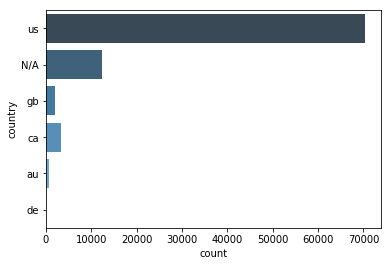

In [44]:
sns.countplot(y="country", data=ufoFrame, palette="Blues_d")

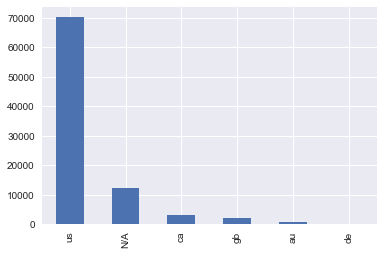

In [106]:
pd.value_counts(ufoFrame['country']).plot.bar()

This plot tells me that the UFO sightings mainly took place in several countries, and United States is the country with most sighting events. According to my knowledge, there has been an alien fever in United States since last century. It is not weird that most majority of the events took place in United States, because people here prefer to explain  supernatural phenomenon as UFO. While in other cultures, even if the same event occurs, people might prefer to explain it as gods epiphany or mythical legend creatures.

### 2) State

Now let's take a look at states. For states column, only countplot makes sense because the data distributes totally randomly. First we need to resize the plot to get a clearer view.

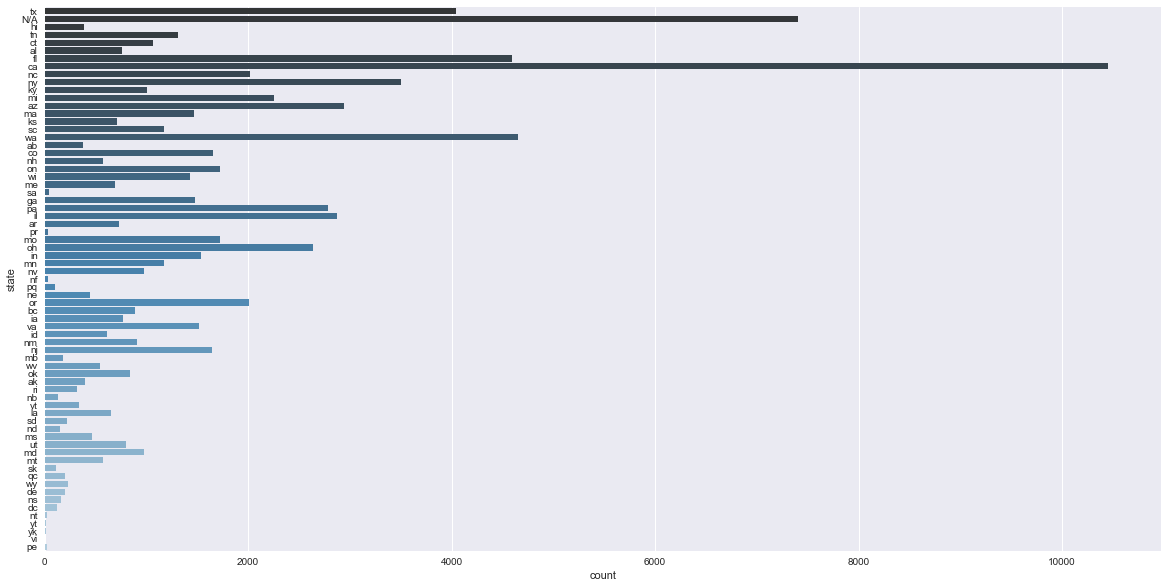

In [45]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(y="state", data=ufoFrame, palette="Blues_d")

We can also make ordered plot with pandas.

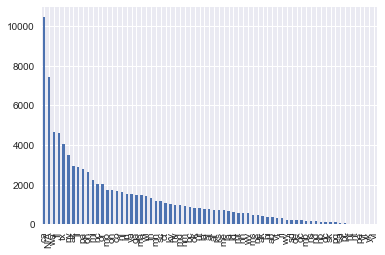

In [105]:
pd.value_counts(ufoFrame['state']).plot.bar()

This plot tells me that the UFO sightings mainly took place in states in United States, and there are also sightings in other countries(N/A). The state of United States that has most signting events is California, and the second is Washington State, and the third is Florida. Texas, New York and Arizona are following closely. The distribution seems random, but there should be a reason for this result, like geographical condition, or industrial condition.

### 3) Latitude

For latitude column, because it is correlated to country, here we can use histogram to see the distribution.

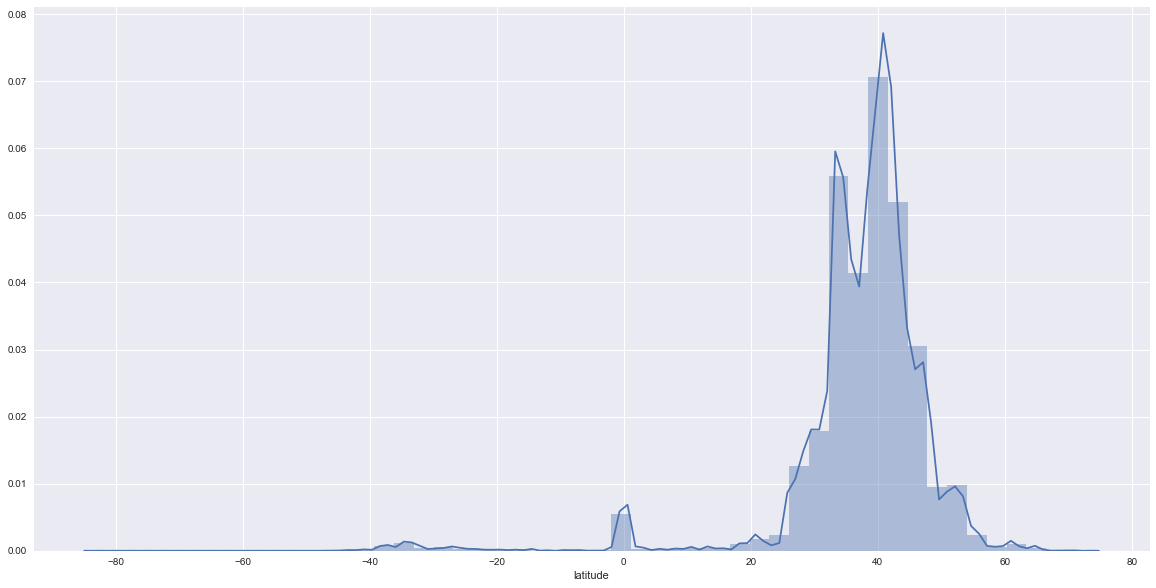

In [46]:
sns.distplot(ufoFrame['latitude'])

This plot tells me that the latitute of the sighting events mainly occurred between latitude 25°N and 55°N， which corresponds to the latitude of United States(25N-49N). And it also shows an increase around 0°(equator). But when I look at the data, I found that some data is actually with 0 latitude and 0 longitude, which means that the posiiton is unknown.

### 4) Longitude

For longitude column, although it is not influenced by latitude column, they both are correlated to country. Here we can use histogram to see the distribution.

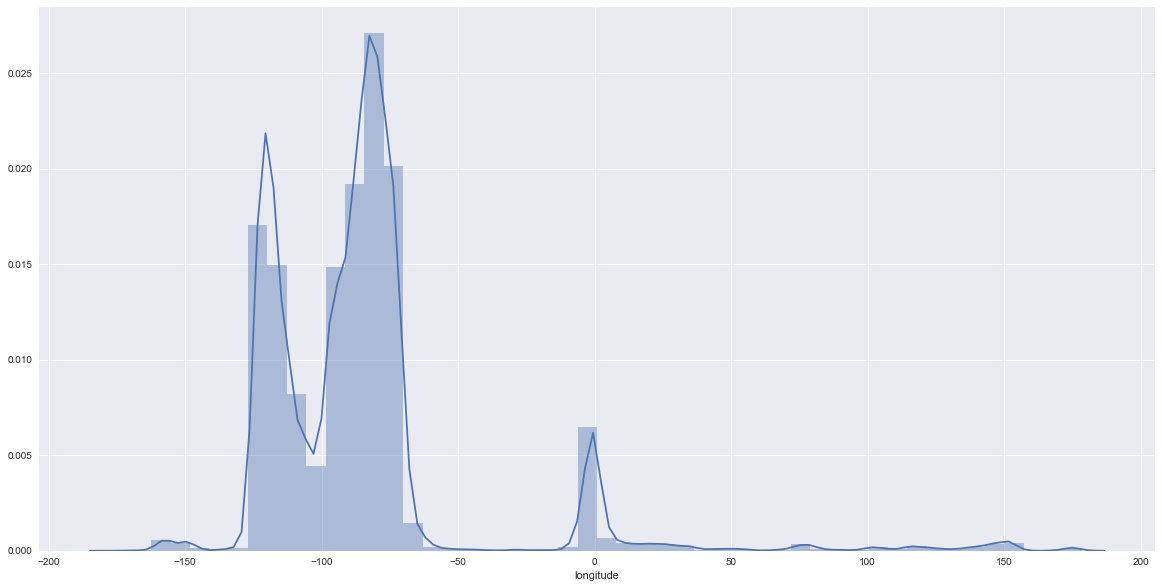

In [47]:
sns.distplot(ufoFrame['longitude'])

This plot tells me that the longitude of the sighting events mainly occurred between longitude 70°W and 130°W， which corresponds to the latitude of United States(73W-125W). And there is also an increase around 0°, same reason as latitude.

### 5) Duration (seconds)

In [48]:
ufoFrame['duration (seconds)']

0        2700.0
1        7200.0
2          20.0
3          20.0
4         900.0
5         300.0
6         180.0
7        1200.0
8         180.0
9         120.0
10        300.0
11        180.0
12       1800.0
13        180.0
14         30.0
15       1200.0
16        120.0
17       1800.0
18         20.0
19        120.0
20       2700.0
21       1200.0
22       1200.0
23        360.0
24         60.0
25          3.0
26         30.0
27         30.0
28        300.0
29        900.0
          ...  
88649    1290.0
88650      60.0
88651     300.0
88652     900.0
88653       5.0
88654       1.0
88655     180.0
88656     120.0
88657       4.0
88658       0.0
88659       0.0
88660       8.0
88661      90.0
88662       0.0
88663    3600.0
88664      60.0
88665       3.0
88666      15.0
88667      60.0
88668     120.0
88669     180.0
88670      20.0
88671     600.0
88672    1200.0
88673       0.0
88674    1200.0
88675       5.0
88676    1020.0
88677       0.0
88678       0.0
Name: duration (seconds)

For duration column, there is no other factors that affects the data. So we use countplot here as well.

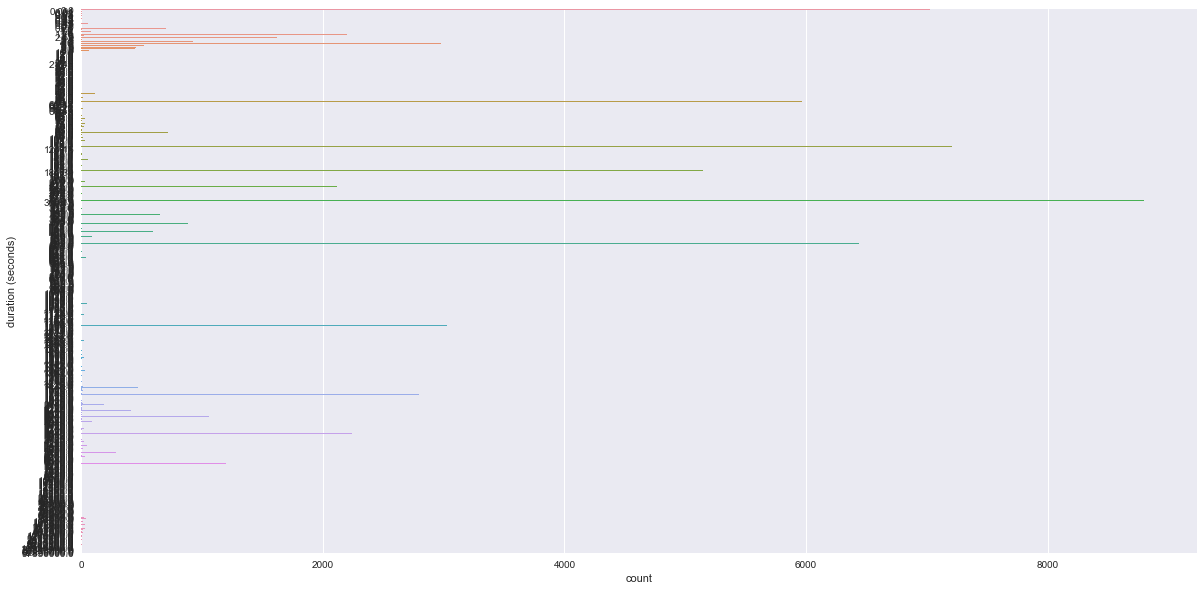

In [49]:
sns.countplot(y='duration (seconds)', data=ufoFrame)

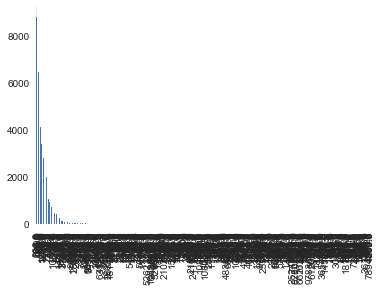

In [107]:
pd.value_counts(ufoFrame['duration (seconds)']).plot.bar()

From this plot, we can see that the duration (seconds) distributes quite randomly in a wide range. The maximum value is over 8000 seconds. It makes sense because there is no clear limit of this data. The shortest duration might be a blink of eye, which is also the shortest time we can realize. But the longest duration could be in hours or even days. However, most events only lasted for several seconds. In this column, there are obviously some outliers. Most majority of the data is less than a few minutes, but still, very few of the data is over 2000 seconds. 

### 6) Shape

For shape column, we also use countplot.

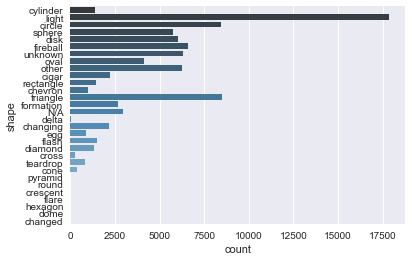

In [101]:
sns.countplot(y="shape", data=ufoFrame, palette="Blues_d")

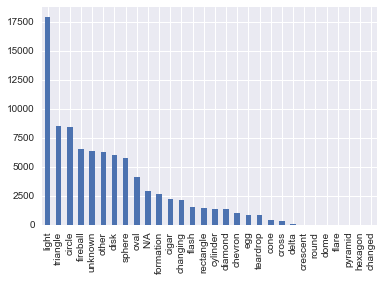

In [103]:
pd.value_counts(ufoFrame['shape']).plot.bar()

From this plot, we can see that most witnesses recognize the UFO they saw as light. Other shapes are also recognized by many people. This colomn of data distributes randomly as well, because sighting events are not related. The outlier here would be light, which is much greater than others.

### Question 2: What are the summary statistics?

In [51]:
ufoFrame.describe()

,duration (seconds),latitude,longitude
count,8.867700e+04,88677.000000,88677.000000
mean,8.391636e+03,37.453041,-85.022789
std,5.911467e+05,11.572520,41.421118
min,0.000000e+00,-82.862752,-176.658056
25%,1.500000e+01,34.035000,-112.073333
50%,1.200000e+02,39.233333,-87.650000
75%,6.000000e+02,42.717778,-77.770000
max,9.783600e+07,72.700000,178.441900


#### Count: the total count of data in the column.
#### Mean: the mean value of the column data.
#### std: the standard deviation of the column data.
#### min: the minimum value in the column.
#### 25%: the data at the 25%th position from the minimum value. 
#### 50%: the data at the 50%th position from the minimum value. Also known as median.
#### 75%: the data at the 75%th position from the minimum value. 
#### max: the maximum value in the column.

Then, how much are the columns related to each other? We can use corr to calculate the correlation coefficient.

In [108]:
ufoFrame.corr(method='pearson',min_periods=1)

,duration (seconds),latitude,longitude
duration (seconds),1.000000,0.001854,0.006069
latitude,0.001854,1.000000,-0.457324
longitude,0.006069,-0.457324,1.000000


We can see that a column is fully correlated to itself. The coefficient between latitude and longitude is relatively high. However, duration is hardly correlated to the other two numerical columns.

# Part B - Web Scraper

First, import the libraries I'm going to use. In order to implement writing

In [32]:
from __future__ import print_function
import urllib3
import unicodedata
from bs4 import BeautifulSoup, SoupStrainer, Comment
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import xlwt

Here I choose a website portfoliobox.net, which is for making online personal portfolios.

In [33]:
# portfoliobox.net
url='http://portfoliobox.net'

Then send the GET request to the server and wait for response.

In [34]:
http = urllib3.PoolManager()
response = http.request('GET',url)
response.status

200

The response status returns 200, which means 'OK', 'Request fulfilled, document follows'.

Then use BeatifulSoup to extract all the a elements from the DOM and store in a list.

In [35]:
soup=BeautifulSoup(response.data, "lxml")
links = soup.find_all('a')

Now take a look at the links.

In [36]:
links

[<a href="/"><div class="pbox-logo"></div></a>,
 <a href="/createaccount">Sign up</a>,
 <a href="/login"><img alt="Login" src="https://d28avw9ny3vgf2.cloudfront.net/application/_img/salesite/common/login.png"/>Login</a>,
 <a href="/fr"><div class="flag fr"></div></a>,
 <a href="/de"><div class="flag de"></div></a>,
 <a href="/es"><div class="flag es"></div></a>,
 <a href="/it"><div class="flag it"></div></a>,
 <a href="/pt"><div class="flag pt"></div></a>,
 <a href="/nl"><div class="flag nl"></div></a>,
 <a href="/se"><div class="flag se"></div></a>,
 <a href="/no"><div class="flag no"></div></a>,
 <a href="/dk"><div class="flag dk"></div></a>,
 <a href="/cn"><div class="flag cn"></div></a>,
 <a href="/jp"><div class="flag jp"></div></a>,
 <a href="/kr"><div class="flag kr"></div></a>,
 <a href="/ru"><div class="flag ru"></div></a>,
 <a href="/fi"><div class="flag fi"></div></a>,
 <a href="/hu"><div class="flag hu"></div></a>,
 <a href="/pl"><div class="flag pl"></div></a>,
 <a href="/

Here we only consider external links. Obviously, external links start with "http://", and there are also a lot of internal links.

Now, let's see the url of all the links.

In [37]:
for a in soup.find_all('a', href=True):print ("url:",a['href'])

url: /
url: /createaccount
url: /login
url: /fr
url: /de
url: /es
url: /it
url: /pt
url: /nl
url: /se
url: /no
url: /dk
url: /cn
url: /jp
url: /kr
url: /ru
url: /fi
url: /hu
url: /pl
url: /tr
url: /gr
url: /vn
url: /id
url: /
url: /examples
url: /pricing
url: /learn
url: /news
url: /students
url: /
url: /examples
url: /pricing
url: /login
url: /learn
url: /news
url: /students
url: http://www.adamkrollphotography.com/
url: http://www.ryanlilburn.com/
url: http://www.dpjoe.com/
url: http://www.eyanhigginsjones.com/
url: http://www.martinstranka.com/
url: http://www.barekoza.no/
url: http://www.lightmare.net/
url: http://www.sebastianakesson.com/
url: http://www.aaronpedersen.co/
url: http://www.aurelienlongo.com/
url: http://www.jefferyricht.com/
url: http://www.loveonphotography.com/
url: /createaccount
url: /createaccount
url: /examples
url: /pricing
url: /students
url: /photography-portfolio
url: /designer-portfolio
url: /art-portfolio
url: /makeup-artist-website
url: /model-website
u

Now, let's create a new excel object using xlwt library, and create a new sheet.

In [50]:
book = xlwt.Workbook(encoding='utf-8', style_compression=0)

In [51]:
sheet = book.add_sheet('links', cell_overwrite_ok=True)

In this sheet, there are 4 column, which are url, texture description, validation of the link, and datetime of the last check. Use sheet.write to write into the object. The first parameter is the row number. The second is the column number. And the third is the content.

In [52]:
sheet.write(0, 0, 'url')
sheet.write(0, 1, 'Textual Description')
sheet.write(0, 2, 'Valid')
sheet.write(0, 3, 'Datetime')

Now, we need to loop through every element in the list to judge whether it is an external link. If so, we send a GET request to the url and wait for a response status. When we receive 200, it means the link is valid. However, if it is  not external link, we pass the element. In both cases, we are going to write the information into the workbook object we just created.

Here comes the function definition:

In [53]:
def checkValid(link,i):  
    valid = "True"
    invalid = "False"
    if http.request('GET',link['href']).status == 200:
        print(link['href'], valid)
        sheet.write(i,0,link['href'])
        sheet.write(i,1,'url:'+link['href'])
        sheet.write(i,2,valid)
        sheet.write(i,3,datetime.now())
    else:
        print(link['href'], invalid)
        sheet.write(i,0,link['href'])
        sheet.write(i,1,'url:'+link['href'])
        sheet.write(i,2,invalid)
        sheet.write(i,3,datetime.now())

In a for loop that traverses all the links, call the function.

In [54]:
i=1
for link in soup.find_all('a', href=True):
    if link['href'].startswith('http'):
        checkValid(link,i)
        i = i+1

http://www.adamkrollphotography.com/ True
http://www.ryanlilburn.com/ True
http://www.dpjoe.com/ True
http://www.eyanhigginsjones.com/ True
http://www.martinstranka.com/ True
http://www.barekoza.no/ True
http://www.lightmare.net/ True
http://www.sebastianakesson.com/ True
http://www.aaronpedersen.co/ True
http://www.aurelienlongo.com/ True
http://www.jefferyricht.com/ True
http://www.loveonphotography.com/ True
https://www.findcreatives.com/ True
https://www.facebook.com/portfoliobox True
https://twitter.com/portfoliobox True
https://plus.google.com/103476120225460848054/posts True
http://www.pinterest.com/portfoliobox/ True
http://flickr.com/portfoliobox True
https://instagram.com/portfoliobox/ True
https://www.linkedin.com/company/portfoliobox False
https://www.facebook.com/portfoliobox True
https://twitter.com/portfoliobox True
https://instagram.com/portfoliobox/ True
https://plus.google.com/103476120225460848054/posts True
http://www.pinterest.com/portfoliobox/ True
http://flickr.c

Finally, save the workbook object to file.

In [55]:
book.save('links.xls')

Now an excel file can be found in the dir of the notebook.